# Neural Network for Predicting House Price

1) First, we need to import the libaries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')

2) Explore the data

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

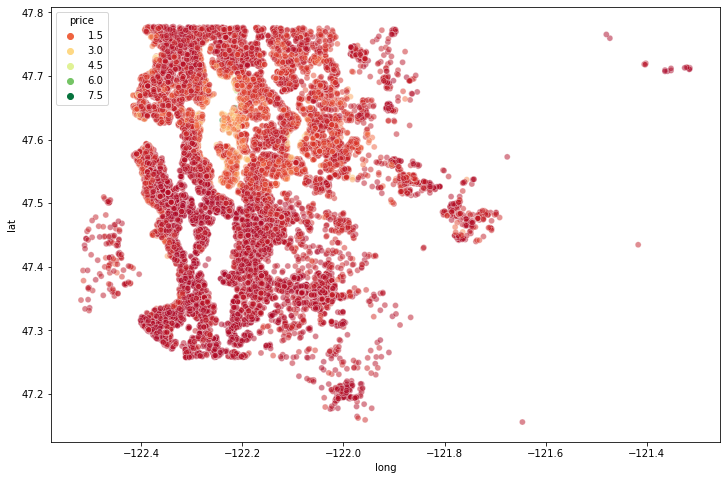

In [4]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y= 'lat', data = df, alpha = 0.5, palette = 'RdYlGn',hue = 'price')

3) Cleaning the data

In [5]:
#According to the corralation id and zipcode is dropped, and to be time is separated
df = df.drop('id', axis = 1)
df = df.drop('zipcode', axis = 1)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df = df.drop('date', axis = 1)

4) Traning the data

In [6]:
X = df.drop('price', axis = 1).values
y = df['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
earlyS = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25)

model.add(Dense(19, activation = 'tanh'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), batch_size = 256, epochs=400, callbacks=[earlyS])

Epoch 1/400
60/60 [==============================] - 1s 5ms/step - loss: 430247706624.0000 - val_loss: 418966896640.0000
Epoch 2/400
60/60 [==============================] - 0s 3ms/step - loss: 429992345600.0000 - val_loss: 418001059840.0000
Epoch 3/400
60/60 [==============================] - 0s 3ms/step - loss: 425005940736.0000 - val_loss: 404346437632.0000
Epoch 4/400
60/60 [==============================] - 0s 3ms/step - loss: 385271005184.0000 - val_loss: 322770862080.0000
Epoch 5/400
60/60 [==============================] - 0s 3ms/step - loss: 245531459584.0000 - val_loss: 151883153408.0000
Epoch 6/400
60/60 [==============================] - 0s 3ms/step - loss: 138348527616.0000 - val_loss: 131149578240.0000
Epoch 7/400
60/60 [==============================] - 0s 3ms/step - loss: 132692410368.0000 - val_loss: 126239719424.0000
Epoch 8/400
60/60 [==============================] - 0s 3ms/step - loss: 122703478784.0000 - val_loss: 108745277440.0000
Epoch 9/400
60/60 [=============

60/60 [==============================] - 0s 3ms/step - loss: 29970042880.0000 - val_loss: 28875458560.0000
Epoch 70/400
60/60 [==============================] - 0s 3ms/step - loss: 29671272448.0000 - val_loss: 28592500736.0000
Epoch 71/400
60/60 [==============================] - 0s 3ms/step - loss: 29703727104.0000 - val_loss: 28423288832.0000
Epoch 72/400
60/60 [==============================] - 0s 3ms/step - loss: 29583753216.0000 - val_loss: 28279205888.0000
Epoch 73/400
60/60 [==============================] - 0s 3ms/step - loss: 29492334592.0000 - val_loss: 28760528896.0000
Epoch 74/400
60/60 [==============================] - 0s 3ms/step - loss: 29425160192.0000 - val_loss: 28363773952.0000
Epoch 75/400
60/60 [==============================] - 0s 3ms/step - loss: 29311481856.0000 - val_loss: 27941238784.0000
Epoch 76/400
60/60 [==============================] - 0s 3ms/step - loss: 29296410624.0000 - val_loss: 27885156352.0000
Epoch 77/400
60/60 [==============================] -

60/60 [==============================] - 0s 2ms/step - loss: 25491646464.0000 - val_loss: 23325552640.0000
Epoch 138/400
60/60 [==============================] - 0s 3ms/step - loss: 25072490496.0000 - val_loss: 23427131392.0000
Epoch 139/400
60/60 [==============================] - 0s 3ms/step - loss: 25008697344.0000 - val_loss: 23809132544.0000
Epoch 140/400
60/60 [==============================] - 0s 2ms/step - loss: 25250594816.0000 - val_loss: 23232180224.0000
Epoch 141/400
60/60 [==============================] - 0s 3ms/step - loss: 25072975872.0000 - val_loss: 23350847488.0000
Epoch 142/400
60/60 [==============================] - 0s 2ms/step - loss: 24874735616.0000 - val_loss: 22877425664.0000
Epoch 143/400
60/60 [==============================] - 0s 3ms/step - loss: 24658337792.0000 - val_loss: 23958990848.0000
Epoch 144/400
60/60 [==============================] - 0s 3ms/step - loss: 24755617792.0000 - val_loss: 23127588864.0000
Epoch 145/400
27/60 [============>............

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
prediction = model.predict(X_test)
print(mean_squared_error(y_test, prediction)**0.5)
print(mean_absolute_error(y_test, prediction))
print(explained_variance_score(y_test, prediction))